In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('placement_Outlier.csv')

In [7]:
df.shape

(1000, 3)

In [15]:
df.skew()

cgpa                   -0.003704
placement_exam_marks    0.835642
placed                  0.044077
dtype: float64

# Selecting Boundary

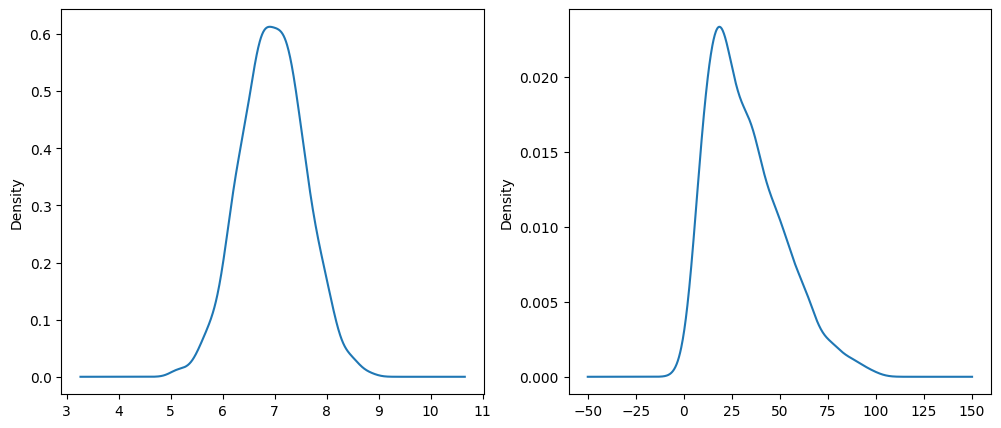

In [19]:
figure, (fig1, fig2) = plt.subplots(ncols = 2, figsize = (12, 5))
df['cgpa'].plot(kind='kde', ax = fig1)
df['placement_exam_marks'].plot(kind='kde', ax = fig2)

plt.show()

In [6]:
upper_boundary = df['cgpa'].mean()+3*df['cgpa'].std()
lower_boundary = df['cgpa'].mean()-3*df['cgpa'].std()

# Triming
## only done for normal distribution

In [9]:
triming_df = df[(df['cgpa']>lower_boundary) & (df['cgpa']<upper_boundary)]

In [10]:
triming_df.shape

(995, 3)

# Capping

## useeful for skewd transformation

In [11]:
capping_df = df

In [13]:
capping_df['cgpa'] = np.where(
    capping_df['cgpa']>upper_boundary,
    upper_boundary,
    np.where(
        capping_df['cgpa']<lower_boundary,
        lower_boundary,
        capping_df['cgpa']
    )
)

In [14]:
capping_df.shape

(1000, 3)